# Back to the Future : Time Travelling through Wikispeedia

## Part 0 : Preprocessing of data

#### Setting the environment 
Please check SETUP.md and pip_requirements.txt before running this notebook.

In [5]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import os as os

from src.scripts.loading_data import *
from src.scripts.plotting import *

## Part 1 : Defining the best moment to play Wikispeedia

## Part 2 : Wikipedia evolution between 2007 and 2024

### 2.0) About the subset of articles used in the game

In this part, we investigate the evolution of Wikipedia between 2007 and 2024. To do so, we compare the structures and versions of the 4600 articles that were selected in the 2007 Wikispeedia dataset at both time points. The subselection of articles was done by the creators of the game Wikispeedia [1], [2]. 

[1] Robert West and Jure Leskovec:
     Human Wayfinding in Information Networks.
     21st International World Wide Web Conference (WWW), 2012.
[2] Robert West, Joelle Pineau, and Doina Precup:
     Wikispeedia: An Online Game for Inferring Semantic Distances between Concepts.
     21st International Joint Conference on Artificial Intelligence (IJCAI), 2009.

#### Loading the raw scrapping of Wikipedia 2024

To compare Wikipedia structure between 2007 and 2024 we first had to retrieve the content of the current Wikipedia database. We scrapped the 4604 equivalent articles of Wikispeedia by referring by their names. The details of this step can be found in ```scrapping.ipynb```.


In [6]:
from src.scripts.loading_data import *

# importing articles names and links
raw_articles2007, raw_links2007 = loading_articles_links('2007', raw = True)
raw_articles2024, raw_links2024 = loading_articles_links('2024', raw = True)

In [7]:
# checking the sizes 
print('Number of articles in 2007 :',len(raw_articles2007)) 
print('Number of articles in 2024 :',len(raw_articles2024))
print('Number of links in 2007 :', raw_links2007.shape[0]) 
print('Number of links in 2024 :',raw_links2024.shape[0])

Number of articles in 2007 : 4604
Number of articles in 2024 : 4592
Number of links in 2007 : 119882
Number of links in 2024 : 223975


Interstingly, by scrapping the corresponding articles, we miss 11 articles. Let us investigate on which articles we are missing these particular articles in 2024 and why did their scrapping  fail.

#### From eleven missing articles to only four

When retrieving 2024 Wikipedia articles, for eleven article names the corresponding URL did not exist anymore in 2024. For seven of them we could find the equivalent page on Wikipedia 2024 with a slightly different name. The corresponding URL to the new page is provided in brakets, along with the new name. However for four of them no evident equivalent page culd be found. This leads us to think that these four specific pages have been removed from Wikipedia between 2007 and 2024.

- Athletics_(track_and_field) (https://en.wikipedia.org/wiki/Track_and_field, Track_and_field)
- Bionicle__Mask_of_Light (https://en.wikipedia.org/wiki/Bionicle:_Mask_of_Light, Bionicle:_Mask_of_Light)
- Directdebit (https://en.wikipedia.org/wiki/Direct_debit, Direct_debit)
- Friend_Directdebit (-)
- Gallery_of_the_Kings_and_Queens_of_England (-)
- Newshounds (https://en.wikipedia.org/wiki/News_Hounds, News_Hounds)
- Sponsorship_Directdebit (-)
- Star_Wars_Episode_IV__A_New_Hope (https://en.wikipedia.org/wiki/Star_Wars_(film), Star_Wars_(film))
- Wikipedia_Text_of_the_GNU_Free_Documentation_License (https://en.wikipedia.org/wiki/Wikipedia:Text_of_the_GNU_Free_Documentation_License, Wikipedia:Text_of_the_GNU_Free_Documentation_License)
- Wowpurchase (-)
- X-Men__The_Last_Stand (https://en.wikipedia.org/wiki/X-Men:_The_Last_Stand, X-Men:_The_Last_Stand)

We manually added the seven newly named articles back to the dataframe of 2024 articles, by referring to them with their previous name, for comparability.
To investigate a bit more the four missing pages, let us look at their plain text articles, provided by Wikispeedia.

In [12]:
os.getcwd()

'c:\\Users\\blouv\\Documents\\COURS\\ADA\\ada-2024-project-outlier-1'

In [11]:
# define path to the data
PLAIN_TEXT_PATH = 'data/2007/plain_text_articles/'

# extract the plain text articles from 2007
Friend_Directdebit = open(os.path.join(PLAIN_TEXT_PATH, 'Friend_Directdebit.txt')).read()
Gallery_of_the_Kings_and_Queens_of_England = open(os.path.join(PLAIN_TEXT_PATH, 'Gallery_of_the_Kings_and_Queens_of_England.txt')).read()
Sponsorship_Directdebit = open(os.path.join(PLAIN_TEXT_PATH, 'Sponsorship_Directdebit.txt')).read()
Wowpurchase = open(os.path.join(PLAIN_TEXT_PATH, 'Wowpurchase.txt')).read()

FileNotFoundError: [Errno 2] No such file or directory: 'data/2007/plain_text_articles/Gallery_of_the_Kings_and_Queens_of_England.txt'

In [ ]:
print(Friend_Directdebit)

                             [1x1.gif] [1x1.gif]


   [Direct_Debit.gif]

Become an SOS Friend - Direct Debit


   Thank you for taking a moment to complete this simple form, and for
   helping us help orphaned and abandoned children around the world.

   The minimum donation for an SOS friend is £10/month. If you cannot
   afford this, please use this link to making a smaller regular donation.

   All the normal Direct Debit safeguards and guarantees apply. No changes
   in the amount, date or frequency to be debited can be made without
   notifying you at least 10 working days in advance of your accounts
   being debited. In the event of any error, you are entitled to an
   immediate refund from your Bank or Building Society. You have the right
   to cancel a Direct Debit Instruction at any time simply by writing to
   your Bank or Building Society, with a copy to us.

   Any questions?
   If you have any queries, or would like to make a Direct Debit Donation
   over the phone, pleas

In [ ]:
print(Gallery_of_the_Kings_and_Queens_of_England)

   #copyright

Gallery of the Kings and Queens of England

2007 Schools Wikipedia Selection. Related subjects: British History

   This is a gallery of the Kings and Queens of England.

House of Wessex

                         Alfred the Great (871-899)

                         Edward the Elder (899-924)

                               Ælfweard (924)

       Athelstan (924-939)The first de facto King of a unified England

                             Edmund I (939-946)

                               Edred (946-955)

                           Edwy the Fair (955-959)

                               Edgar (959-975)

                       St Edward the Martyr (975-978)

                 Ethelred the Unready (978-1013, 1014-1016)

                         Sweyn Forkbeard (1013-1014)

                           Edmund Ironside (1016)

                             Canute (1016-1035)

                         Harold Harefoot (1035-1040)

                          Harthacanute (1040-1042)


In [ ]:
print(Sponsorship_Directdebit)

                             [1x1.gif] [1x1.gif]


   [Direct_Debit.gif]

Sponsor a Child with SOS Children - Direct Debit


   Thank you for taking a moment to complete this simple form, and for
   helping us help orphaned and abandoned children around the world.

   The minimum donation for child sponsorship is £20/month. If you cannot
   afford this, please consider making a smaller regular donation. Use one
   of these links: you can become an SOS friend for a minimum of £10 per
   month or make a regular donation for a minimum of £5 per month.

   All the normal Direct Debit safeguards and guarantees apply. No changes
   in the amount, date or frequency to be debited can be made without
   notifying you at least 10 working days in advance of your accounts
   being debited. In the event of any error, you are entitled to an
   immediate refund from your Bank or Building Society. You have the right
   to cancel a Direct Debit Instruction at any time simply by writing to
   your Bank 

In [ ]:
print(Wowpurchase)

                             [1x1.gif] [1x1.gif]


Buy WOW wrist bands
to support SOS Children


   You can purchase WOW Wristbands from this page.
   You will need a debit or credit card to pay for them.
   If you don't have a card, please place your order by post.

   The wrist bands cost £1 each.

   Postage is 50p for up to 5 bands, £1 for 6 to 20 bands,
   £1.50 for 21 to 50 bands and £2 for 51 to 1000 bands.
   Number of wrist bands: _____
   Proceed to Purchase

                           SOS Children's Villages
                            WOW wrist band detail

   SOS Children refers to the worldwide work of SOS-KDI and is a trading
   name for SOS Children's Villages UK

   For further information about our work please see our children charity
   web site or sponsoring a child.

   Charity Commission registered number 1069204

   [1x1.gif] [1x1.gif]



Interestingly, it seems like the three articles DirectDebit, SponsorshipDebit and Wowpurchase are not articles but foundraise forms. It is probable that since this kind of page does not respect Wikipedia's policy, they were removed from the plateform. Wikispeedia players could however go to these pages and click on their links if they wanted to. Lastly, it is not sure why Gallery_of_the_Kings_and_Queens_of_England was removed from wikipedia, it is probable that this subject was restructured into several pages for each of the royal family, which is why we cannot find one single equivalent page in 2024.

For the rest of our study, we will let these four article in 2007 without matching article in 2024. However, we will probably have to remove them from some visualizations when matching dimensions between the two datasets will be needed.

#### Re-importing 2024 articles
As seen in the previous part, we were able to identify seven articles present in 2007 that we missed when importing their equivalent of 2024 because of a name change. In ```scrapping.ipynb``` we rescrapped all 2024 articles's links with the seven additional articles and their actual name. From now on, we will use this new dataset for the rest of our analysis.

In [13]:
# importing articles names and links
articles2007, links2007 = loading_articles_links('2007')
articles2024, links2024 = loading_articles_links('2024')

We now would like to take a look at the links we imported. Some source articles had no targets in 2007 but do have new targets in 2024. The other way around is also possible: 2007 target articles may have change so drasticly that no link exist anymore in 2024. We will thus look at the articles that are not present as source articles in 2007 vs in 2024.

In [ ]:
source_articles2007 = set(links2007.linkSource.drop_duplicates().reset_index(drop = True))
source_articles2024 = set(links2024.linkSource.drop_duplicates().reset_index(drop = True))

print(len(source_articles2007), len(source_articles2024))

4587 4551


In [ ]:
not_in_2007 = source_articles2024 - source_articles2007
not_in_2024 = source_articles2007 - source_articles2024

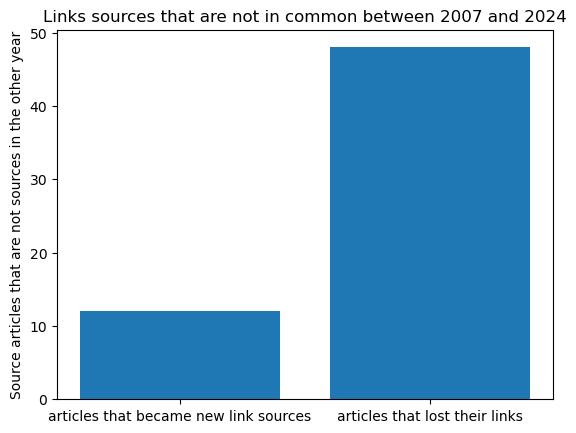

In [ ]:
plt.bar(x=['articles that became new link sources','articles that lost their links'], height=[len(not_in_2007), len(not_in_2024)])
plt.title('Links sources that are not in common between 2007 and 2024')
plt.ylabel("Source articles that are not sources in the other year")
plt.show()

What we observe from comparing the links contained in the articles in the different years : 
- 48 articles have no links redirecting from them in 2024 
- 12 articles have links in 2024 while they had none in 2007

To investigate the cause of this for the 48 missing links articles in 2024, we compared their wikipedia page from the game versus their actual page in 2024 for a few of them taken at random. What happened for them is the following : 
- for 4 articles : as we saw previously, they have been deleted in wikipedia 2024. 3 of them corresponded to fake wiki pages for a donation and one was named Gallery_of_Kings_and_Queens_of_England and was probably reformated and fused to another article that completely changed their name. 
- for the rest of the articles : in 2007, as wikipedia was smaller in general, the articles names were more vague. For example Battle_of_Amiens in 2007 corresponded to the battle that occured in 1918 only. In 2024, the article Battle_of_Amiens is now a Disambigation Page, meaning the title 'Battle_of_Amiens' may refer to multiple different wikipedia pages that carry the same title. If we observe the current page of this article in 2024, it has 3 different links that redirect to pages not included in our restricted 4604 articles database : Siege of Amiens (1597), Battle of Amiens (1870) and finally the Battle of Amiens (1918) that is the one in the 2007 dataset. 

Following this, it would be interesting to check how many of those 48 pages actually carry the 'Disambiguation Page' function in 2024 to validate our hypothesis that this is why this happens. Ideally we could then rescrapp the correct pages of 2024 that do really correspond to their equivalent in 2007. This would modify the number of links on average in 2024, and thus the shortest path matrix that we compute later on. 

Please note that this disambiguouation part of our project is still going on. We however continued our analysis to build a strong pipeline while waiting for the total cleaning of 2024 data. We will have to reperform our analysis afterwards.

### 2.1) Loading the clean data

In [5]:
# importing articles names and links
articles2007, links2007 = loading_articles_links('2007')
articles2024, links2024 = loading_articles_links('2024')

# checking the sizes 
print('2007 :',len(articles2007)) 
print('2024 :',len(articles2024))

2007 : 4604
2024 : 4604


As mentionned above in part 0, some articles have been deleted between 2007 and 2024. So the list of articles of 2024 does not contain them and there are no links redirecting to them in the links2024 file. However we retrieved the articles whose names have been modified and kept the name for 2007 to refer to them in the 2024 list. 

### 2.2) Comparing the Hyperlinks Structure 

As a first analysis to justify our project we compare the two wikipedia version structures. 

T test p value : [6.91824887e-191]


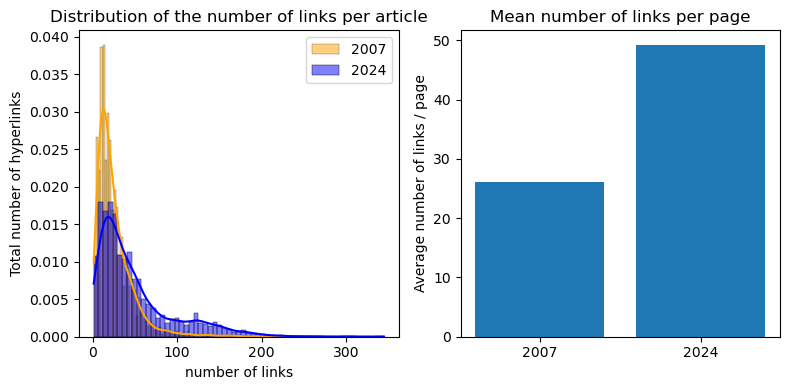

In [6]:
from src.scripts.plotting import *

plot_average_links_per_page(links2007, links2024)

The two distributions seem different, as already observed. In global there are more links per pages on average in 2024 than in 2007, as this is confirmed by our independent T test p value of 6.9e-191, this difference is statistically significative. When looking a the distributions we also see that the 2024 one has more articles with a higher number of links and also less articles with a small number of links. 

c:\Users\blouv\Documents\COURS\ADA\ada-2024-project-outlier-1\src\scripts\plotting.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= difference.index, y = difference, palette= colors)


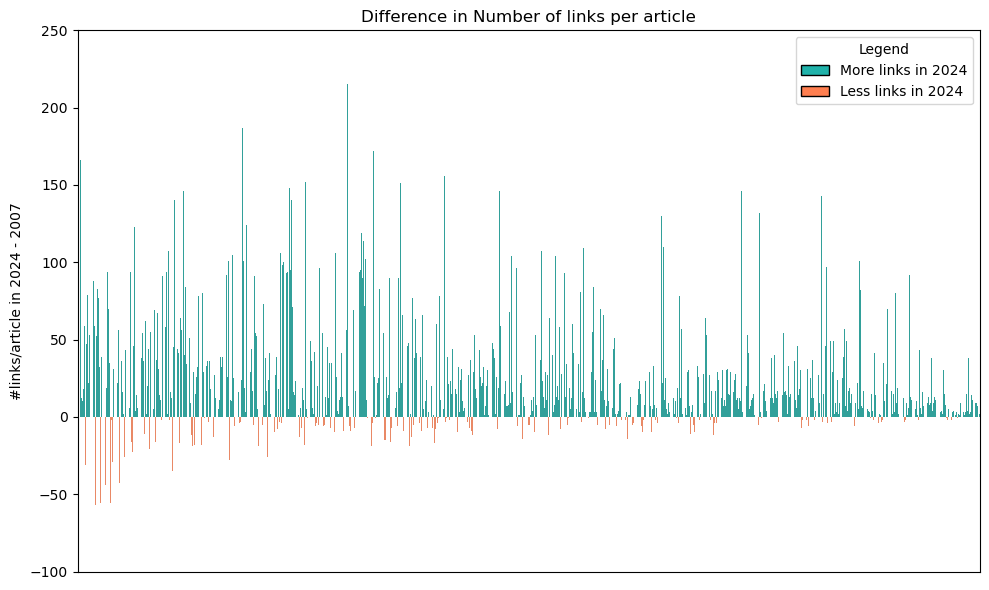

In [7]:
plot_difference_links_article(links2007, links2024)

Here we look more closely at each article, to see how the number of links per page evolved. Everything above zero represent a positive difference between the number of links in 2024 minus the number in 2007 so this relates to when 2024 has more links than 2007, and everything below will thus correspond to 2024 having less links than in 2007. Visually we can already see that there tends to be more links in 2024 than in 2007 for the same article. 

### 2.3) Shortest Paths comparison

As a metric to how connected the two wikipedia are, we also look into the shortest path amtrix for the both of them. They are computed using the Floyd Warshall algorithms. We verified that the function used, from the networkx package, produced the exact same matrix for the 2007 data in the exploratory notebook. 

In [14]:
### creating Graphs 
G_2007 = creating_graph(links2007, articles2007)
G_2024 = creating_graph(links2024, articles2007)
# here we use the list of articles from 2007 as it has all the nodes
# whereas some are missing in the 2024 list as stated earlier 
# it is important to create all the nodes even if we don't have any link 
# that connects them to the other, in order to generate the difference map later
# so that the two spm have the same dimensions

### computing shortest path matrices (spm)
# this step takes approx 15 min
spm_2007 = computing_shortest_path_matrix(G_2007, articles2007)
spm_2024 = computing_shortest_path_matrix(G_2024, articles2007)

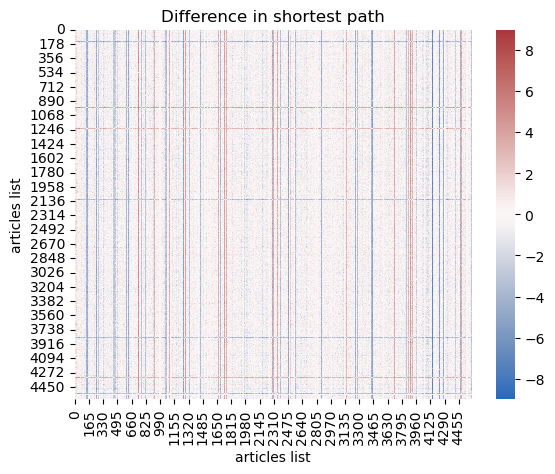

In [15]:
plotting_difference_heatmap(spm_2007,spm_2024)

Similarly, in this heatmap we substract the Shortest Path Matrix of 2024 minus the one of 2007. This way any point corresponding to a red value means the path from the two articles is shorter in 2024, while blue means the path in 2024 is longer than in 2007

## Part 3 : Performance of the players depending on the year

## Part 4 : LLM performance on different versions